In [77]:
from coffea.nanoevents import NanoEventsFactory,BaseSchema,DelphesSchema,NanoAODSchema
import dask_awkward as dak
import hist
import matplotlib.pyplot as plt
import mplhep as hep

In [34]:
events = NanoEventsFactory.from_root(
    file="./events_2021100911011863214.root:events",
    schemaclass=BaseSchema,
    # schemaclass=DelphesSchema, Doesn't work 
    # schemaclass=NanoAODSchema.v7, Doesn't work
    metadata={
        "path":"/eos/experiment/fcc/ee/generation/DelphesEvents/spring2021/IDEA/kkmcp8_ee_mumu_ecm240/",
        "name":"kkmcp8_ee_mumu_ecm240",
        "process":"Z/gamma* to mumu, ecm=240 GeV"
    }
).events()

In [35]:
events.fields

['Electron',
 'Electron#0',
 'Electron#0/Electron#0.index',
 'Electron#0/Electron#0.collectionID',
 'Muon',
 'Muon#0',
 'Muon#0/Muon#0.index',
 'Muon#0/Muon#0.collectionID',
 'AllMuon',
 'AllMuon#0',
 'AllMuon#0/AllMuon#0.index',
 'AllMuon#0/AllMuon#0.collectionID',
 'EFlowNeutralHadron',
 'EFlowNeutralHadron/EFlowNeutralHadron.type',
 'EFlowNeutralHadron/EFlowNeutralHadron.energy',
 'EFlowNeutralHadron/EFlowNeutralHadron.energyError',
 'EFlowNeutralHadron/EFlowNeutralHadron.position.x',
 'EFlowNeutralHadron/EFlowNeutralHadron.position.y',
 'EFlowNeutralHadron/EFlowNeutralHadron.position.z',
 'EFlowNeutralHadron/EFlowNeutralHadron.positionError[6]',
 'EFlowNeutralHadron/EFlowNeutralHadron.iTheta',
 'EFlowNeutralHadron/EFlowNeutralHadron.phi',
 'EFlowNeutralHadron/EFlowNeutralHadron.directionError.x',
 'EFlowNeutralHadron/EFlowNeutralHadron.directionError.y',
 'EFlowNeutralHadron/EFlowNeutralHadron.directionError.z',
 'EFlowNeutralHadron/EFlowNeutralHadron.shapeParameters_begin',
 'EFlo

In [51]:
jet_charge = events['Jet/Jet.charge']
jet_charge = jet_charge > 0

In [57]:
dak.num(jet_charge).compute()

<Array [0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0] type='100000 * int64'>

In [58]:
dak.sum(dak.num(jet_charge)).compute()

5661

In [61]:
(dak.num(jet_charge) > 0).compute()

<Array [False, False, False, ..., False, False, False] type='100000 * bool'>

In [62]:
(jet_charge[dak.num(jet_charge) > 0]).compute()

<Array [[False], [True], ..., [False], [True]] type='5475 * [var * bool[par...'>

In [86]:
hist_jet_charge = hist.Hist.new.Regular(4,-2,2).Double().fill(dak.num(events['Jet/Jet.charge']).compute())
hist_jet_energy = hist.Hist.new.Regular(10,0,10).Double().fill(dak.num(events['Jet/Jet.energy']).compute())

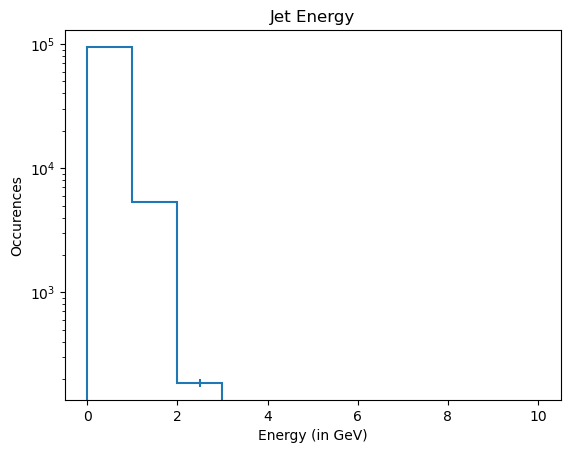

In [93]:
fig, ax = plt.subplots()
hep.histplot(hist_jet_energy, ax = ax)
ax.set_yscale('log')
ax.set_title('Jet Energy')
ax.set_xlabel('Energy (in GeV)')
ax.set_ylabel('Occurences');

In [96]:
events['Muon#0'].compute()

<Array [{'Muon#0.index': [...], ...}, ...] type='100000 * struct[{"Muon#0.i...'>

In [99]:
events['Muon#0/Muon#0.index'].compute()

<Array [[1, 0], [0, 1], ..., [0, ...], [0, 1]] type='100000 * [var * int32[...'>